In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
from sklearn import preprocessing

Делать кластеризацию будем те же данные, что и в иерархическом кластерном анализе:
- предпочтения в прохладительных напитках
- анализ кандидатов
- деление стран по тратам на разные виды еды

In [9]:
# https://drive.google.com/file/d/1YB63zg8vrhewHXuULbgFN3eCmpDPJg-O/view?usp=share_link
! gdown 1YB63zg8vrhewHXuULbgFN3eCmpDPJg-O

Downloading...
From: https://drive.google.com/uc?id=1YB63zg8vrhewHXuULbgFN3eCmpDPJg-O
To: /content/beverage_r.csv
100% 732/732 [00:00<00:00, 1.06MB/s]


# Прохладительные напитки
У людей спрашивали, какие напитки за последнее время они пили. 1 - пил, 0 - не пил. Нужно на основе данных кластеризовать опрашиваемых для дальнейших маркетинговых исследований.

In [49]:
df1 = pd.read_csv('/content/beverage_r.csv', sep=';', index_col='numb.obs')
df1.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


In [50]:
df1.shape

(34, 8)

Алгоритм построение модели в sklearn:
- инициализация модели, задание внешних параметров (гиперпараметров)
- подгонка (обучение) модели через метод fit
- предсказание для новых наблюдений через метод predict

**Кластеризация**

In [51]:
# максимальное число итераций
max_iter_1 = 300

In [53]:
from pandas.core.common import random_state
# инициализация модели
model = KMeans(n_clusters=3, # доустим 3 кластера
               random_state=42, # зерно датчика случайных чисел - здесь начальный центр кластеров
               max_iter=max_iter_1, # число итераций кластеризации
               n_init=10, # число итераций с разным начальным расположением кластеров - защита от неудачного начального центра кластеров
               verbose=0, # не выдавать промежуточные результаты
               tol=0.0001) # порог, если перемещений между кластерами мало, Ws меняется на меньше чем задано)

In [54]:
# кластеризация
model.fit(df1)

KMeans(n_clusters=3, n_init=10, random_state=42)

# Проверяем, сколько потребовалось итераций
Бывает, что алгоритм не успевает сойтись. В таком случае программа не выдаст об этом предупреждение, нужно проверять самому

In [55]:
model.n_iter_

2

In [56]:
max_iter_2 = 1
# Проверим, будет ли предупреждение
model_2 = KMeans(n_clusters=3,
               random_state=42,
               max_iter=max_iter_2,
               n_init=10, 
               verbose=0, 
               tol=0.0001)

In [57]:
# никаких предупреждений
model_2.fit(df1)

KMeans(max_iter=1, n_clusters=3, n_init=10, random_state=42)

In [58]:
model_2.n_iter_

1

In [59]:
# добавляем проверку
if model_2.n_iter_ == max_iter_2:
    print(f'не сошлось за {model_2.n_iter_} итераций')
else:
    print(f'сошлось за {model_2.n_iter_} итераций')

не сошлось за 1 итераций


По умолчанию в модели способ определения начальных центров кластеров *k-means++* (есть еще случайный выбор, который хуже).
Также используется алгоритм Ллойда (параметр algorith='auto')

In [60]:
# смотрим результаты - номера кластеров объектов
model.labels_

array([0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1], dtype=int32)

In [61]:
# расположение центров кластеров
model.cluster_centers_

array([[ 7.27272727e-01,  2.72727273e-01,  9.09090909e-02,
         9.09090909e-02,  4.54545455e-01,  1.00000000e+00,
         9.09090909e-02,  4.54545455e-01],
       [ 1.11022302e-16,  1.00000000e+00,  5.45454545e-01,
         5.45454545e-01, -5.55111512e-17, -5.55111512e-17,
         9.09090909e-01,  0.00000000e+00],
       [ 1.00000000e+00,  2.50000000e-01,  8.33333333e-02,
         0.00000000e+00,  9.16666667e-01, -5.55111512e-17,
        -5.55111512e-17,  3.33333333e-01]])

# С чего надо начинать
**Определим число кластеров без угадываний.**

Необходимо применить модель для разного числа кластеров для построения графика каменистой осыпи. Метод `inertia_` возвращает сумму квадратов расстояний от каждого объекта до его центра кластера (тот самый критерий качества Ws). Кластеризация будет качественной, если инерция перестает сильно уменьшаться при увеличении числа кластеров

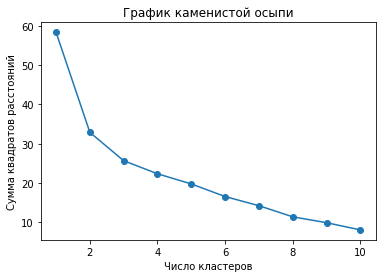

In [62]:
K = range(1, 11)

# вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(df1) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('График каменистой осыпи')
plt.show()

Сильный излом при 2 кластерах, однако с 2 до 3 тоже, а вот с 3 по 4 излома почти не видно. Делаем вывод, что кластеров 3

In [63]:
df1['cluster'] = model.labels_

In [64]:
df1.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545
1,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
2,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333


In [65]:
 df1['cluster'].value_counts()

2    12
0    11
1    11
Name: cluster, dtype: int64

**Стоит заметить, что полученные средние в каждом поле это центр кластеров.**

В данном случае среднее - процент тех, кто пил напиток в течение последних двух недель.

Нулевой кластер - любители разнообразия. При этом он, скорее всего, содержит в себе 2 подкластера. Но группы очень малы.

Первый кластер - все пили диетическую колу + как минимум половина пила все диетическое

Второй кластер - все пили пепси и колу


Результаты от иерархического анализа отличаются:

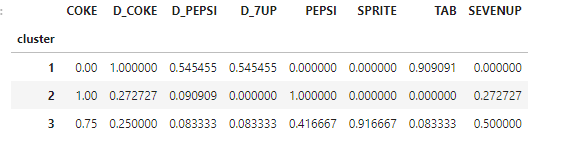

# Новые наблюдения
А что делать, если у нас появились новые объекты?
Есть 2 варианта:
- правильный, но долгий: добавляем объекты и проводим кластеризацию заново
- быстрый: новые объекты распределяются по старым кластерам с помощью `predict`

In [66]:
# создадим 2 объекта: один пил все, другой ничего
new_obj = [[1]*8, [0]*8]

model.predict(new_obj)

array([0, 2], dtype=int32)

Кто пил все - 0 кластер: любитель всего. Второй объект - 2 кластер, т.е. кто пил классику: пепси и колу. Если первый вариант логичен, то второй не совсем. Однако расстояние от центра до объекта было наименьшим до 2 кластера (там кстати есть 0), поэтому сработал метод исключения. Хотя по факту человек не отнсоится ни к какой фокус группе и может считаться выбросом

In [72]:
# Сделаем новый датафрейм с этими объектами и проведем снова кластерный анализ
df1_new = pd.read_csv('/content/beverage_r.csv', sep=';', index_col='numb.obs')

In [73]:
row1 = pd.Series([1]*8, index=df1_new.columns)
df1_new = df1_new.append(row1,ignore_index=True) 

In [76]:
row2 = pd.Series([0]*8, index=df1_new.columns)
df1_new = df1_new.append(row2,ignore_index=True) 

In [79]:
df1_new.shape

(36, 8)

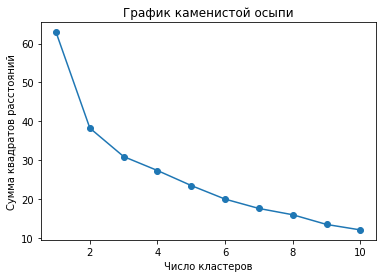

In [80]:
K = range(1, 11)

# вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(df1_new) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('График каменистой осыпи')
plt.show()

В целом получается снова 3 кластера

In [81]:
model_1_2 = KMeans(n_clusters=3, 
               random_state=42, 
               max_iter=max_iter_1, 
               n_init=10, 
               verbose=0, 
               tol=0.0001) 

In [82]:
model_1_2.fit(df1_new)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [84]:
# хоть данных мало, проверим
if model_1_2.n_iter_ == max_iter_1:
    print(f'не сошлось за {model_1_2.n_iter_} итераций')
else:
    print(f'сошлось за {model_1_2.n_iter_} итераций')

сошлось за 3 итераций


In [85]:
df1_new['cluster'] = model_1_2.labels_

In [86]:
df1_new.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.923077,0.230769,0.076923,0.000000,0.846154,0.0,0.000000,0.307692
1,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
2,0.750000,0.333333,0.166667,0.166667,0.500000,1.0,0.166667,0.500000


In [87]:
# посмотрим, куда распределились последние объекты
df1_new.tail(2)

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP,cluster
34,1,1,1,1,1,1,1,1,2
35,0,0,0,0,0,0,0,0,0


Объект, который пил все, попал во 2 группу - любителей всего

Второй объект попал в 0 группу - фанатов пепси и колы

# Кластеризация претендентов на работу
Есть претенденты, навыки которых оценивали по 10-бальной шкале. Проверялись следующие качества:

- Память на числа
- Умение решать математические задачи
- Находчивость при прямом диалоге
- Умение составлять алгоритмы
- Уверенность во время выступления
- Командный дух
- Находчивость
- Сотрудничество
- Признание в коллективе
- Сила убеждения

In [88]:
# https://drive.google.com/file/d/156pIWPFH8JcqJoc9CI8OrHd0qqhluvQM/view?usp=share_link
!gdown 156pIWPFH8JcqJoc9CI8OrHd0qqhluvQM

Downloading...
From: https://drive.google.com/uc?id=156pIWPFH8JcqJoc9CI8OrHd0qqhluvQM
To: /content/assess.dat
100% 656/656 [00:00<00:00, 1.02MB/s]


In [92]:
df2 = pd.read_csv('/content/assess.dat', sep='\t', index_col=['NR' ,'NAME'])
df2.head()

,,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NR,NAME,,,,,,,,,,
1,Volker,10,10,9,10,10,10,9,10,10,9
2,Sigrid,10,10,4,10,5,5,4,5,4,3
3,Elmar,5,4,10,5,10,4,10,5,3,10
4,Peter,10,10,9,10,10,10,9,10,10,9
5,Otto,4,3,5,4,3,10,4,10,10,5


Все данные измерены в одной шкале, стандартизация не нужна. Начнем кластеризацию

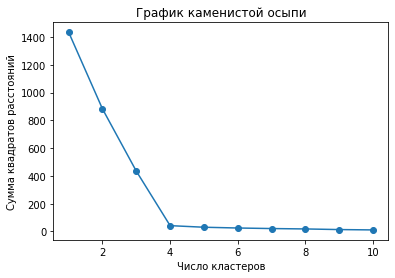

In [93]:
K = range(1, 11)

# вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(df2) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('График каменистой осыпи')
plt.show()

Очевиден вариант с 4 кластерами

In [95]:
model = KMeans(n_clusters=4,
               random_state=42,
               max_iter=300,
               n_init=10,
               verbose=0)

In [97]:
model.fit(df2)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [98]:
if model.n_iter_ == 300:
    print(f'не сошлось за {model_1_2.n_iter_} итераций')
else:
    print(f'сошлось за {model_1_2.n_iter_} итераций')

сошлось за 3 итераций


In [99]:
df2['cluster'] = model.labels_

In [100]:
df2.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
0,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50


Вариант при иерархическом анализе:

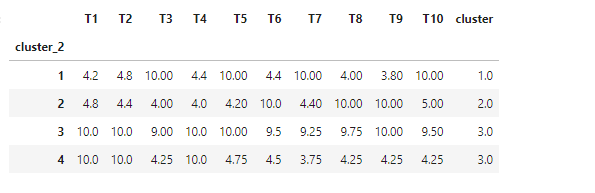

В данном случае все сошлось. Интерпретация:
- 1 кластер: люди с сильными коммуникативными функциями, умеют вести переговоры
- 2 кластер: командные игроки, лидеры
- 3 кластер: математики без каких либо дополнительных талантов
- 4 кластер: математики с с сильными навыками публичных выступлений, а также навыками общения и при этом лидеры. Идеальные кандидаты без слабых мест

# Потребление еды в разных странах
Объекты - страны Европы 20 века с расходами на разные виды питания


In [101]:
# https://drive.google.com/file/d/1xOWurEuwIuW7MIqIA-prc92loHexXY7I/view?usp=share_link
! gdown 1xOWurEuwIuW7MIqIA-prc92loHexXY7I

Downloading...
From: https://drive.google.com/uc?id=1xOWurEuwIuW7MIqIA-prc92loHexXY7I
To: /content/Protein Consumption in Europe.csv
100% 1.22k/1.22k [00:00<00:00, 1.65MB/s]


In [107]:
df3 = pd.read_csv('/content/Protein Consumption in Europe.csv', sep=';', index_col='Country', decimal=',')
df3.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [110]:
df3.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


Проведем стандартизацию, так как данные не в одной шкале, вес будет смещен:
- кластеризация будет больше по хлебобулочным изделиям, молоке и мясе
- остальные особо не будут влиять на кластеризацию

In [111]:
# стандартизация
norm = preprocessing.StandardScaler() # среднее 0, дисперсия 1
norm.fit(df3)
X = norm.transform(df3)

In [115]:
# стандартизированные поля
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8
0,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
1,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
2,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
3,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
4,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


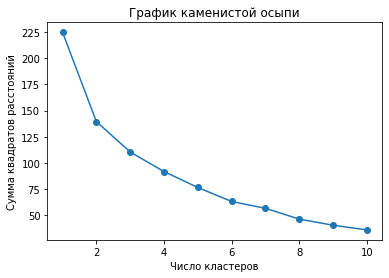

In [116]:
# определяем число кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('График каменистой осыпи')
plt.show()

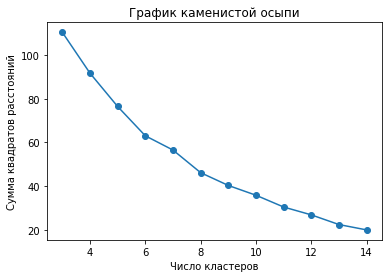

In [118]:
# рассмотрим более подробно график, начиная с 3
K = range(3, 15)

models = [KMeans(n_clusters=k, random_state=42).fit(X) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('График каменистой осыпи')
plt.show()

Четче видно, что кластеров скорее 7. Дальше изменение Ws с увеличением кластеров изменяется меньше, чем до 7.

In [122]:
model = KMeans(n_clusters=7, random_state=42, max_iter=300, n_init=10)
model.fit(X)

df3['cluster'] = model.labels_

In [126]:
# получились кластеры с 1 и 2 объектами
df3.groupby('cluster').size()

cluster
0    1
1    4
2    4
3    2
4    5
5    3
6    6
dtype: int64

In [127]:
df3.groupby('cluster').mean() # достаточно сложно сделать выводы, рассмотрим страны

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
0,9.300000,4.600000,2.100000,16.600000,3.000000,43.600000,6.400000,3.400000,2.900000
1,9.850000,7.050000,3.150000,26.675000,8.225000,22.675000,4.550000,1.175000,2.125000
2,7.125000,4.675000,1.200000,9.450000,0.750000,51.125000,1.950000,5.050000,2.975000
3,6.650000,3.550000,2.100000,6.750000,10.600000,28.100000,5.800000,5.300000,7.550000
4,8.680000,12.160000,3.420000,17.240000,3.000000,29.080000,5.040000,1.400000,4.440000
5,8.166667,6.833333,2.866667,13.666667,3.200000,39.533333,2.766667,5.833333,5.800000
6,14.550000,9.583333,4.000000,21.000000,3.733333,24.533333,4.900000,2.233333,4.233333


In [129]:
df3['cluster'].sort_values()

Country
USSR              0
Sweden            1
Norway            1
Denmark           1
Finland           1
Albania           2
Romania           2
Yugoslavia        2
Bulgaria          2
Portugal          3
Spain             3
Austria           4
E_Germany         4
Netherlands       4
Czechoslovakia    4
Poland            4
Italy             5
Hungary           5
Greece            5
Ireland           6
Belgium           6
Switzerland       6
UK                6
W_Germany         6
France            6
Name: cluster, dtype: int32

Выделяется 1 кластер - Скандинавия, 2 кластер - восточная Европа, 3 кластер - Пиренейский полуостров, 6 кластер - западная Европа. Остальные кластеры включают как средиземноморские страны, так и страны восточной Европы.

Разделим объекты на 5 кластеров, как при иерархическом кластерном анализе:

In [130]:
model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10)
model.fit(X)

df3['cluster_5'] = model.labels_

In [132]:
df3['cluster_5'].sort_values()

Country
Sweden            0
Denmark           0
Finland           0
Norway            0
USSR              1
Czechoslovakia    1
E_Germany         1
Poland            1
Hungary           1
Albania           2
Romania           2
Italy             2
Greece            2
Bulgaria          2
Yugoslavia        2
W_Germany         3
Netherlands       3
France            3
Belgium           3
Switzerland       3
UK                3
Austria           3
Ireland           3
Portugal          4
Spain             4
Name: cluster_5, dtype: int32

В данном случае деление более логично:
0. Скандинавия
1. Социалистические страны, восточная Европа
2. Южная Европа, социалистические страны
3. Западная Европа
4. Пиренейский полуостров